<a href="https://colab.research.google.com/github/subhankar-nitt/Fraud-detection-demo/blob/CNN-Model/CNN%20Model/CNN_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython
print(123)

123


In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset/fraudTrain.csv"
data = pd.read_csv(path)
data.shape

(1296675, 23)

In [ ]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**Splitting "trans_date_trans_time" column into trans_date and trans_time.**

In [ ]:
data[['trans_date','trans_time']] = data.trans_date_trans_time.str.split(expand=True)
data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [ ]:
data['category'].nunique()

14

In [ ]:
data['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

**Mapping category to int values.**

In [ ]:
map={'gas_transport':0,'grocery_pos':1,'home':2,'shopping_pos':3,'kids_pets':4,'shopping_net':5,'entertainment':6,'food_dining':7,'personal_care':8,'health_fitness':9,'misc_pos':10,'misc_net':11,'grocery_net':12,'travel':13}
data=data.applymap(lambda l: map.get(l) if l in map else l)

In [ ]:
data= data.drop(["Unnamed: 0", "trans_date_trans_time", "merchant", "first", "last", "gender", "street", "city", "state", "zip", "job", "dob", "trans_num"], axis=1)
data.head()

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2703186189652095,11,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,630423337322,1,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,38859492057661,6,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3534093764340240,0,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,375534208663984,10,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [ ]:
data.shape

(1296675, 12)

In [ ]:
data['is_fraud'].nunique()

2

In [ ]:
data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

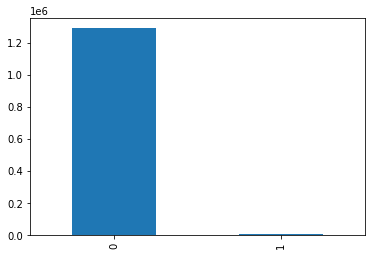

In [ ]:
data.is_fraud.value_counts().plot.bar()

In [ ]:
(data.is_fraud.value_counts())/(data.is_fraud.count())

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

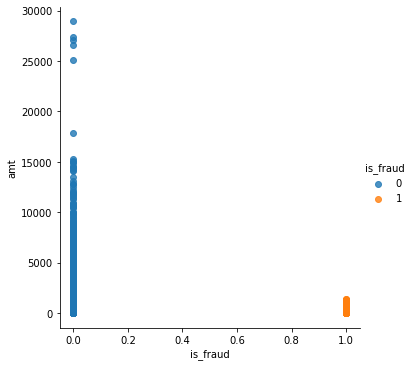

In [ ]:
sns.lmplot(x='is_fraud', y='amt', data=data, fit_reg=False, hue='is_fraud')

**Observations: 
All of the fraudulent transactions happened for less than 5000.**

In [ ]:
print("Fraudulent Transactions")
data['amt'][data['is_fraud']==1]. describe()

Fraudulent Transactions


count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [ ]:
print("Legitimate Transactions")
data['amt'][data['is_fraud']==0]. describe()

Legitimate Transactions


count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [ ]:
non_fraud=data[data.amt>1377]
non_fraud

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
511,4509142395811241,11,1636.87,31.6489,-82.1982,1324,1325400234,31.608415,-83.145823,0,2019-01-01,06:43:54
824,630469040731,5,1433.54,45.6710,-121.8686,1288,1325413769,45.873314,-121.589038,0,2019-01-01,10:29:29
1784,341546199006537,13,3178.51,64.7556,-165.6723,145,1325443875,64.396477,-165.209648,0,2019-01-01,18:51:15
5418,3500165543009955,13,1703.76,42.3669,-82.9938,673342,1325683144,43.309324,-83.145764,0,2019-01-04,13:19:04
5546,630451534402,3,1618.22,46.3535,-86.6345,765,1325689058,46.942478,-85.668308,0,2019-01-04,14:57:38
...,...,...,...,...,...,...,...,...,...,...,...,...
1292248,3577794103155425,10,2091.16,47.7068,-97.2092,733,1371665743,48.301458,-96.508643,0,2020-06-19,18:15:43
1294000,4003989662068504,3,3960.95,33.3224,-86.9657,71463,1371733948,32.866023,-86.340313,0,2020-06-20,13:12:28
1294004,630441765090,13,2789.40,31.9571,-98.9656,1791,1371734063,32.554250,-98.836764,0,2020-06-20,13:14:23
1294387,4536996888716062123,3,2098.05,35.9866,-106.0654,18408,1371745843,35.750881,-106.166758,0,2020-06-20,16:30:43


In [ ]:
non_fraud.is_fraud.nunique()

1

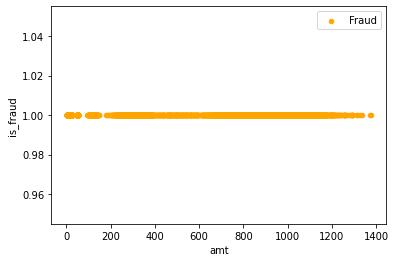

In [ ]:
plot = data[data['is_fraud']==1].plot.scatter(x='amt', y='is_fraud', color='Orange', label='Fraud')
plt.show()

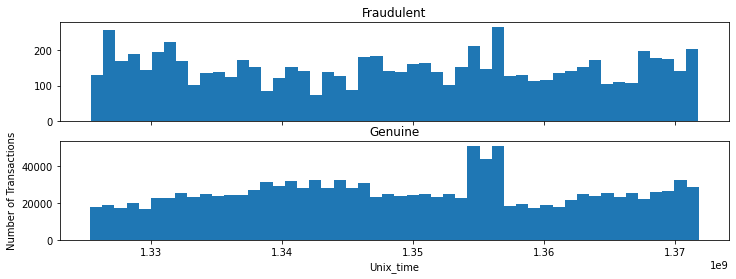

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["unix_time"][data["is_fraud"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["unix_time"][data["is_fraud"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Unix_time')
plt.ylabel('Number of Transactions')
plt.show()

**Transaction patterns for fraudulent and non-fraudulent are more or less the same**. 

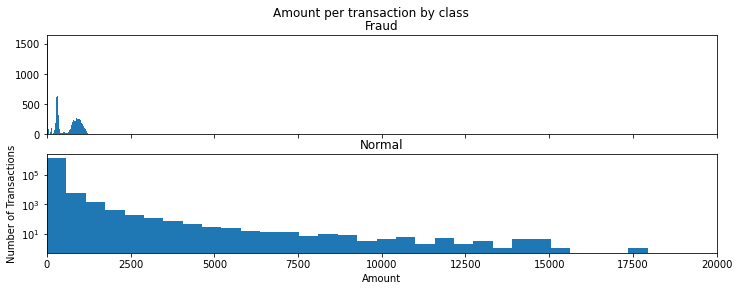

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(data[data.is_fraud==1].amt, bins = bins)
ax1.set_title('Fraud')

ax2.hist(data[data.is_fraud==0].amt, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


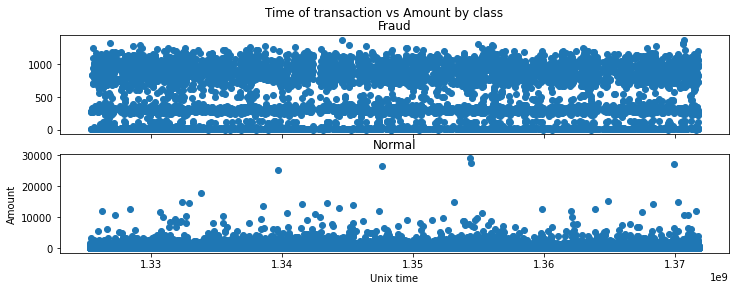

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(data[data.is_fraud==1].unix_time, data[data.is_fraud==1].amt)
ax1.set_title('Fraud')

ax2.scatter(data[data.is_fraud==0].unix_time, data[data.is_fraud==0].amt)
ax2.set_title('Normal')

plt.xlabel('Unix time')
plt.ylabel('Amount')
plt.show()

**The time of transaction does not matter as the pattern is same and throughout.**

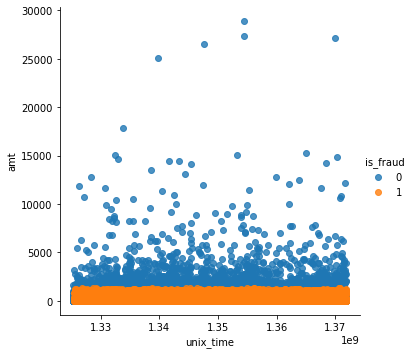

In [ ]:
sns.lmplot(x='unix_time', y='amt', data=data, fit_reg=False, hue='is_fraud')

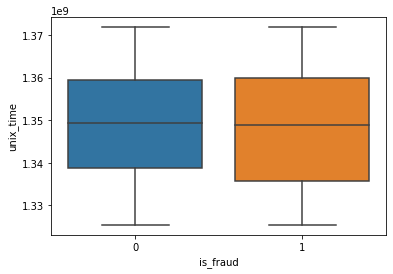

In [ ]:
sns.boxplot(x =data.is_fraud, y = data.unix_time)

**Fraudulent and legitimate transactions occur throughout the time.**

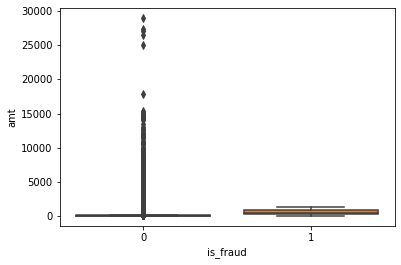

In [ ]:
sns.boxplot(x=data.is_fraud, y=data.amt)

**Non-fraudulent transactions has outliers and fraud transactions are more dispersed or spread out than legitimate ones.**

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

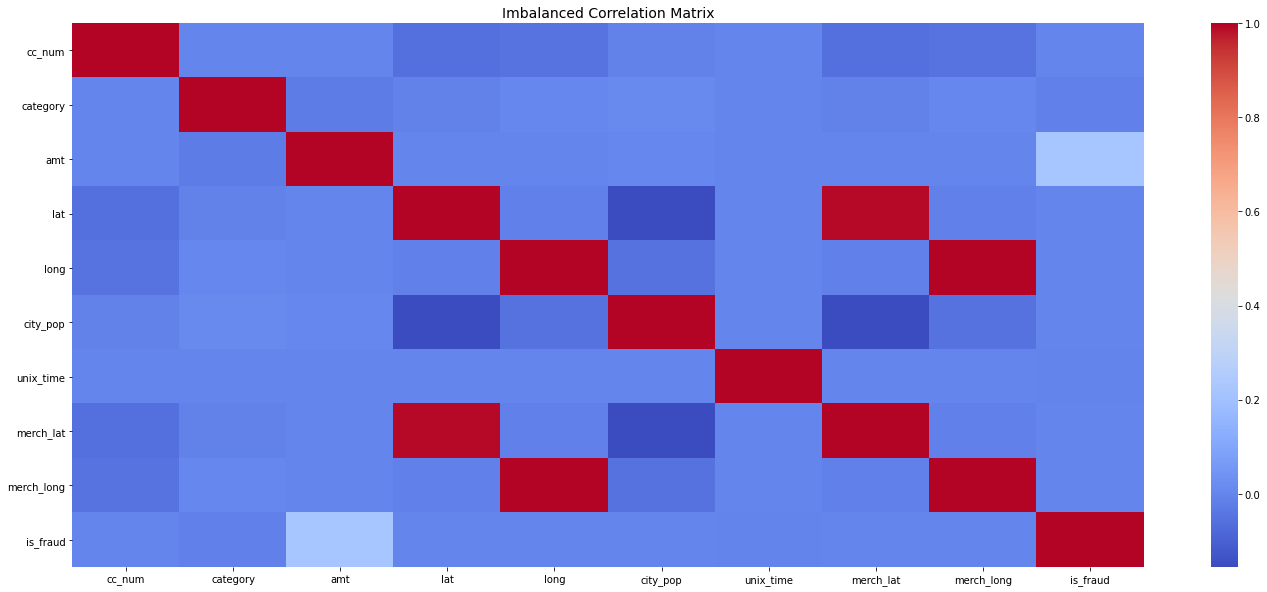

In [ ]:
f, ax = plt.subplots(figsize=(24,10))

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

**Correlation cannot be easily visualized because of the imbalance in the dataset.**

In [ ]:
data["trans_date"] = pd.to_datetime(data["trans_date"]).dt.strftime("%Y%m%d")
data.head()

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2703186189652095,11,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,20190101,00:00:18
1,630423337322,1,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,20190101,00:00:44
2,38859492057661,6,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,20190101,00:00:51
3,3534093764340240,0,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,20190101,00:01:16
4,375534208663984,10,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,20190101,00:03:06


In [ ]:
import time, datetime
def convertTime(t):
    x = time.strptime(t,'%H:%M:%S')
    return str(int(datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()))

In [ ]:
data.trans_time=data.trans_time.apply(convertTime)
data.head()

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2703186189652095,11,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,20190101,18
1,630423337322,1,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,20190101,44
2,38859492057661,6,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,20190101,51
3,3534093764340240,0,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,20190101,76
4,375534208663984,10,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,20190101,186
